In [10]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Load the cell line and drug combination data
data = pd.read_csv('Lit_Data.csv')
BC_data = data[data['Tissue'] == 'Breast']
BC_data.describe()

/tmp/ipykernel_29451/3823485160.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Lit_Data.csv')


,BARCODE,COSMIC_ID,ANCHOR_ID,ANCHOR_CONC,LIBRARY_CONC,ANCHOR_VIABILITY,LIBRARY_RMSE,LIBRARY_EMAX,LIBRARY_XMID,LIBRARY_XMID_uM,...,SYNERGY_EXP_AUC,SYNERGY_OBS_AUC,SYNERGY_EXP_fAUC,SYNERGY_OBS_fAUC,SYNERGY_DELTA_AUC,SYNERGY_DELTA_fAUC,DAY1_NORM_MEAN,DAY1_NORM_SD,GROWTH_RATE,DOUBLING_TIME
count,7103.000000,7.103000e+03,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,...,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,6842.000000,6842.000000,6842.000000,6842.000000
mean,50944.314233,9.260733e+05,1067.750669,1.837682,7.081057,0.779130,0.097514,0.587142,10.303014,129.182604,...,0.648263,0.631297,0.663847,0.641843,0.016966,0.022004,0.598719,0.082327,0.555789,130.550879
std,1104.362151,1.530276e+05,129.172769,1.935582,4.801010,0.220861,0.032859,0.249923,3.235462,556.180384,...,0.216238,0.240843,0.221501,0.238639,0.077198,0.078905,0.259243,0.028243,0.461896,430.242278
min,48749.000000,7.497100e+05,1005.000000,0.000625,0.012500,0.022866,0.014067,0.000669,-1.834412,0.000800,...,0.010488,0.000693,0.003395,0.012059,-0.305580,-0.418207,0.093587,0.022510,-0.270371,-686.533200
25%,49992.000000,9.059510e+05,1005.000000,0.625000,2.000000,0.686570,0.075641,0.412160,8.204211,1.910800,...,0.528573,0.477306,0.540337,0.492253,-0.031658,-0.017962,0.443943,0.063710,0.265731,53.020930
50%,51291.000000,9.068620e+05,1011.000000,1.000000,10.000000,0.870653,0.092403,0.634748,10.396300,11.812700,...,0.704390,0.688767,0.727531,0.702476,0.004738,0.006354,0.561744,0.078511,0.529973,82.375210
75%,51718.000000,9.107040e+05,1058.000000,2.500000,10.000000,0.934001,0.115339,0.795554,12.447986,64.436000,...,0.812470,0.827459,0.833313,0.837155,0.051619,0.044867,0.724130,0.100129,0.755059,130.779180
max,53005.000000,1.298157e+06,1561.000000,10.000000,20.000000,1.000000,0.199618,0.970943,19.491150,12287.419000,...,0.997965,1.000000,0.994649,0.992502,0.512034,0.675663,1.274485,0.158767,2.066128,3332.441000


In [109]:
BC_data

,BARCODE,COMBI_ID,Tissue,CELL_LINE_NAME,SIDM,COSMIC_ID,ANCHOR_ID,ANCHOR_NAME,ANCHOR_TARGET,ANCHOR_PATHWAY,...,SYNERGY_OBS_AUC,SYNERGY_EXP_fAUC,SYNERGY_OBS_fAUC,SYNERGY_DELTA_AUC,SYNERGY_DELTA_fAUC,Synergy,DAY1_NORM_MEAN,DAY1_NORM_SD,GROWTH_RATE,DOUBLING_TIME
0,50328,1012:1003,Breast,EVSA-T,SIDM01042,906862,1012,Vorinostat,"HDAC inhibitor Class I, IIa, IIb, IV",Chromatin histone acetylation,...,0.292366,0.337123,0.334030,0.005240,0.003093,False,0.217366,0.049983,1.368223,35.527278
1,50328,1022:1003,Breast,EVSA-T,SIDM01042,906862,1022,AZD7762,"CHEK1, CHEK2",Cell cycle,...,0.590395,0.822944,0.608239,0.136085,0.214706,True,0.217366,0.049983,1.368223,35.527278
2,50328,1012:1003,Breast,EVSA-T,SIDM01042,906862,1012,Vorinostat,"HDAC inhibitor Class I, IIa, IIb, IV",Chromatin histone acetylation,...,0.785044,0.856378,0.862145,-0.029050,-0.005767,False,0.217366,0.049983,1.368223,35.527278
3,50328,1022:1003,Breast,EVSA-T,SIDM01042,906862,1022,AZD7762,"CHEK1, CHEK2",Cell cycle,...,0.739091,0.925778,0.758550,0.078168,0.167228,True,0.217366,0.049983,1.368223,35.527278
4,50328,1011:1003,Breast,EVSA-T,SIDM01042,906862,1011,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,...,0.757713,0.870667,0.855080,0.010894,0.015586,False,0.217366,0.049983,1.368223,35.527278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,48753,1012:2172,Breast,HCC2157,SIDM00774,749715,1012,Vorinostat,"HDAC inhibitor Class I, IIa, IIb, IV",Chromatin histone acetylation,...,0.003531,0.018177,0.027518,0.014213,-0.009341,False,0.491632,0.083474,0.653183,73.227110
7099,48753,1011:2172,Breast,HCC2157,SIDM00774,749715,1011,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,...,0.047207,0.094016,0.060295,0.044568,0.033721,False,0.491632,0.083474,0.653183,73.227110
7100,48753,1191:2172,Breast,HCC2157,SIDM00774,749715,1191,Bortezomib,Proteasome,Protein stability and degradation,...,0.239986,0.281855,0.240263,0.035150,0.041592,False,0.491632,0.083474,0.653183,73.227110
7101,48753,1011:2172,Breast,HCC2157,SIDM00774,749715,1011,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,...,0.027023,0.050522,0.033072,0.022295,0.017450,False,0.491632,0.083474,0.653183,73.227110


In [101]:
BC_data['LIBRARY_CONC'].unique()

array([1.00e-01, 4.00e+00, 1.25e-02, 1.00e+01, 1.00e+00, 2.00e+01,
       5.00e+00, 2.00e+00])

In [113]:
lib = BC_data.groupby(['CELL_LINE_NAME','ANCHOR_NAME','ANCHOR_CONC','LIBRARY_NAME'])['LIBRARY_CONC'].agg(list)
lib.to_frame(name='LIBRARY_CONC').to_csv('library.csv')

In [117]:
anc = BC_data.groupby(['CELL_LINE_NAME','ANCHOR_NAME','LIBRARY_NAME','LIBRARY_CONC'])['ANCHOR_CONC'].agg(list)
anc.to_frame(name='ANCOR_CONC').to_csv('ancor.csv')

In [118]:
replicas = BC_data.groupby(['CELL_LINE_NAME','ANCHOR_NAME', 'ANCHOR_CONC', 'LIBRARY_NAME','LIBRARY_CONC'])['BARCODE'].apply(len)
replicas.to_frame(name='REPLICAS').to_csv('replicas.csv')b

In [ ]:
drugpairs = BC_data.groupby(['CELL_LINE_NAME','ANCHOR_NAME', 'LIBRARY_NAME'])['BARCODE'].apply(len)
drugpairs.to_frame(name='DRUG PAIRS').to_csv('drug_pairs.csv')

In [13]:
BC_data.CELL_LINE_NAME.unique()

array(['EVSA-T', 'MDA-MB-231', 'MDA-MB-436', 'AU565', 'MDA-MB-453',
       'BT-474', 'HCC1395', 'BT-20', 'HCC1428', 'COLO-824', 'CAL-148',
       'HCC38', 'MRK-nu-1', 'HCC1569', 'CAL-51', 'BT-549', 'HCC1143',
       'Hs-578-T', 'MDA-MB-157', 'HCC1599', 'HCC70', 'MDA-MB-361',
       'CAL-120', 'OCUB-M', 'EFM-19', 'JIMT-1', 'HCC1937', 'HCC1187',
       'EFM-192A', 'T47D', 'MDA-MB-468', 'DU-4475', 'HCC2157'],
      dtype=object)

In [14]:
len(BC_data.CELL_LINE_NAME.unique())

33

In [17]:
BC_data.columns

Index(['BARCODE', 'COMBI_ID', 'Tissue', 'CELL_LINE_NAME', 'SIDM', 'COSMIC_ID',
       'ANCHOR_ID', 'ANCHOR_NAME', 'ANCHOR_TARGET', 'ANCHOR_PATHWAY',
       'ANCHOR_DRUG_TYPE', 'ANCHOR_Clin_Rel', 'ANCHOR_CONC', 'LIBRARY_ID',
       'LIBRARY_NAME', 'LIBRARY_TARGET', 'LIBRARY_PATHWAY',
       'LIBRARY_DRUG_TYPE', 'LIBRARY_Clin_Rel', 'LIBRARY_CONC',
       'ANCHOR_VIABILITY', 'LIBRARY_RMSE', 'LIBRARY_EMAX', 'LIBRARY_XMID',
       'LIBRARY_XMID_uM', 'LIBRARY_AUC', 'LIBRARY_fAUC', 'SYNERGY_RMSE',
       'SYNERGY_EXP_EMAX', 'SYNERGY_OBS_EMAX', 'SYNERGY_DELTA_EMAX',
       'SYNERGY_XMID', 'SYNERGY_XMID_uM', 'SYNERGY_DELTA_XMID',
       'SYNERGY_DELTA_XMID_uM', 'SYNERGY_EXP_AUC', 'SYNERGY_OBS_AUC',
       'SYNERGY_EXP_fAUC', 'SYNERGY_OBS_fAUC', 'SYNERGY_DELTA_AUC',
       'SYNERGY_DELTA_fAUC', 'Synergy', 'DAY1_NORM_MEAN', 'DAY1_NORM_SD',
       'GROWTH_RATE', 'DOUBLING_TIME'],
      dtype='object')

## Exploratory Data Analysis

<Axes: >

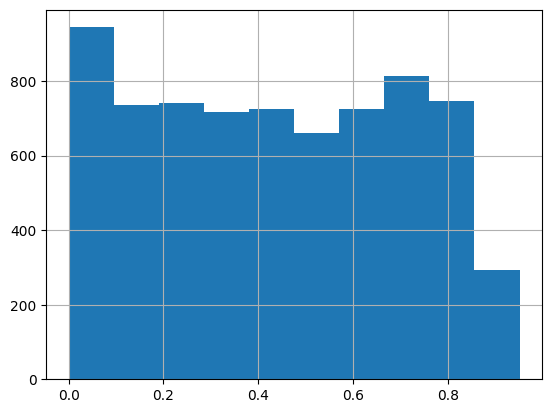

In [18]:
# Visualize the SYNERGY_OBS_EMAX distribution
BC_data['SYNERGY_OBS_EMAX'].hist()

In [20]:
BC_data.shape

(7103, 46)

## Select data with cell lines from cellline.txt

In [59]:
selected_CL = ['EVSA-T', 'MDA-MB-436', 'AU565', 'MDA-MB-453', 'BT-474', 'BT-20', 'HCC38', 'CAL-51', 'BT-549', 'HCC1143',
       'Hs-578-T', 'MDA-MB-157', 'HCC70', 'EFM-19', 'JIMT-1', 'HCC1937', 'HCC1187', 'T47D', 'MDA-MB-468', 'DU-4475']

In [66]:
CL_data = BC_data[BC_data["CELL_LINE_NAME"].isin(selected_CL)]


In [67]:
CL_data.shape

(4424, 46)

In [80]:
selected_data = CL_data[['ANCHOR_NAME', 'LIBRARY_NAME', 'LIBRARY_EMAX', 'SYNERGY_OBS_EMAX', 'CELL_LINE_NAME']]

In [81]:
selected_data.shape

(4424, 5)

In [82]:
selected_data.head()

,ANCHOR_NAME,LIBRARY_NAME,LIBRARY_EMAX,SYNERGY_OBS_EMAX,CELL_LINE_NAME
0,Vorinostat,Camptothecin,0.869652,0.286221,EVSA-T
1,AZD7762,Camptothecin,0.869652,0.178024,EVSA-T
2,Vorinostat,Camptothecin,0.869652,0.792313,EVSA-T
3,AZD7762,Camptothecin,0.869652,0.310391,EVSA-T
4,Navitoclax,Camptothecin,0.869652,0.705166,EVSA-T


In [75]:
selected_data['ANCHOR_NAME'].unique()

array(['Vorinostat', 'AZD7762', 'Navitoclax', 'MK-1775', 'Cisplatin',
       'Gemcitabine', '5-Fluorouracil', 'Pictilisib', 'Linsitinib',
       'Taselisib', 'Bortezomib'], dtype=object)

In [74]:
selected_data['LIBRARY_NAME'].unique()

array(['Camptothecin', 'Cisplatin', 'Docetaxel', 'Navitoclax', 'Olaparib',
       'Axitinib', 'AZD7762', 'Afatinib', 'NU7441', 'Wee1 Inhibitor',
       'Nutlin-3a (-)', 'ZM447439', 'Alisertib', 'RO-3306', 'MK-2206',
       '5-Fluorouracil', 'Paclitaxel', 'Crizotinib', 'Tozasertib',
       'MK-1775', 'Gemcitabine', 'GSK269962A', 'Trametinib', 'Sapitinib',
       'Uprosertib', 'Lapatinib', 'SCH772984', 'Entinostat', 'JQ1'],
      dtype=object)

In [76]:
len(selected_data['ANCHOR_NAME'].unique())

11

In [77]:
len(selected_data['LIBRARY_NAME'].unique())

29

In [78]:
11*29*20

6380

## Build the ML model

In [83]:
selected_data

,ANCHOR_NAME,LIBRARY_NAME,LIBRARY_EMAX,SYNERGY_OBS_EMAX,CELL_LINE_NAME
0,Vorinostat,Camptothecin,0.869652,0.286221,EVSA-T
1,AZD7762,Camptothecin,0.869652,0.178024,EVSA-T
2,Vorinostat,Camptothecin,0.869652,0.792313,EVSA-T
3,AZD7762,Camptothecin,0.869652,0.310391,EVSA-T
4,Navitoclax,Camptothecin,0.869652,0.705166,EVSA-T
...,...,...,...,...,...
6869,Vorinostat,JQ1,0.061935,0.000688,DU-4475
6870,Navitoclax,JQ1,0.061935,0.003219,DU-4475
6871,Bortezomib,JQ1,0.061935,0.016714,DU-4475
6872,Navitoclax,JQ1,0.061935,0.000738,DU-4475


In [88]:
# Categorical encoding using label encoding
from sklearn.preprocessing import LabelEncoder

In [93]:
# Creat instance of labelencoder
labelencoder = LabelEncoder()
selected_data['Anchor_Cat'] = labelencoder.fit_transform(selected_data['ANCHOR_NAME'])
selected_data['Library_Cat'] = labelencoder.fit_transform(selected_data['LIBRARY_NAME'])
selected_data['Cellline_Cat'] = labelencoder.fit_transform(selected_data['CELL_LINE_NAME'])

/tmp/ipykernel_29451/3053522101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Anchor_Cat'] = labelencoder.fit_transform(selected_data['ANCHOR_NAME'])
/tmp/ipykernel_29451/3053522101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Library_Cat'] = labelencoder.fit_transform(selected_data['LIBRARY_NAME'])
/tmp/ipykernel_29451/3053522101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [94]:
selected_data

,ANCHOR_NAME,LIBRARY_NAME,LIBRARY_EMAX,SYNERGY_OBS_EMAX,CELL_LINE_NAME,Anchor_Cat,Library_Cat,Cellline_Cat
0,Vorinostat,Camptothecin,0.869652,0.286221,EVSA-T,10,5,7
1,AZD7762,Camptothecin,0.869652,0.178024,EVSA-T,1,5,7
2,Vorinostat,Camptothecin,0.869652,0.792313,EVSA-T,10,5,7
3,AZD7762,Camptothecin,0.869652,0.310391,EVSA-T,1,5,7
4,Navitoclax,Camptothecin,0.869652,0.705166,EVSA-T,7,5,7
...,...,...,...,...,...,...,...,...
6869,Vorinostat,JQ1,0.061935,0.000688,DU-4475,10,12,5
6870,Navitoclax,JQ1,0.061935,0.003219,DU-4475,7,12,5
6871,Bortezomib,JQ1,0.061935,0.016714,DU-4475,2,12,5
6872,Navitoclax,JQ1,0.061935,0.000738,DU-4475,7,12,5


In [95]:
selected_data['Cellline_Cat'].unique()

array([ 7, 16,  0, 17,  2,  1, 11,  4,  3,  8, 13, 15, 12,  6, 14, 10,  9,
       19, 18,  5])

## Train the ML model

In [97]:
# Set up train, cross-validation and test datasets
# We should draw samples from each cell line equally as test data
import pycaret

In [98]:
train_X = pd.read_csv('../../train_X.csv')